In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/ML_assignment/ERA_V1/S8/ToSubmit/"

Mounted at /content/drive
/content/drive/MyDrive/ML_assignment/ERA_V1/S8/ToSubmit


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from utils import plot_loss_accuracy
from model import Net, train_model, test_model
import matplotlib.pyplot as plt

In [ ]:
# Device configuration -use CUDA tensor types if available
cuda = torch.cuda.is_available()
device = 'cuda' if cuda else 'cpu'
print("CUDA Available?", cuda)
SEED = 1
# For reproducibility
torch.manual_seed(SEED)
if cuda:
  torch.cuda.manual_seed(SEED)

CUDA Available? True


In [ ]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(), #convert image to PyTorch tensor
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2443, 0.2408, 0.2581)), #normalize
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4942, 0.4851, 0.4504), (0.2439, 0.2402, 0.2582)) #apply normalization
    ])

In [ ]:
train_data = datasets.CIFAR10('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10('../data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 64
class_map = {
    0: 'plane',
    1: 'car',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [ ]:
# Data to plot accuracy and loss graphs for models
train_losses_bn = []
test_losses_bn = []
train_accuracy_bn = []
test_accuracy_bn = []

train_losses_ln = []
test_losses_ln = []
train_accuracy_ln = []
test_accuracy_ln = []

train_losses_gn = []
test_losses_gn = []
train_accuracy_gn = []
test_accuracy_gn = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [ ]:
model_bn = Net(norm='bn').to(device)
optimizer = optim.SGD(model_bn.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc_bn, train_loss_bn = train_model(model_bn, device, train_loader, optimizer, criterion)
  train_accuracy_bn.append(train_acc_bn)
  train_losses_bn.append(train_loss_bn)
  test_acc_bn, test_loss_bn = test_model(model_bn, device, test_loader, criterion)
  test_accuracy_bn.append(test_acc_bn)
  test_losses_bn.append(test_loss_bn)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.7709 Batch_id=781 Accuracy=43.34: 100%|██████████| 782/782 [00:16<00:00, 46.84it/s] 


Test set: Average loss: 0.0200, Accuracy: 5345/10000 (53.45%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.2306 Batch_id=781 Accuracy=58.38: 100%|██████████| 782/782 [00:08<00:00, 94.90it/s]


Test set: Average loss: 0.0173, Accuracy: 6075/10000 (60.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.4015 Batch_id=781 Accuracy=64.80: 100%|██████████| 782/782 [00:08<00:00, 95.18it/s]


Test set: Average loss: 0.0142, Accuracy: 6776/10000 (67.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.6818 Batch_id=781 Accuracy=68.12: 100%|██████████| 782/782 [00:08<00:00, 94.91it/s]


Test set: Average loss: 0.0135, Accuracy: 6970/10000 (69.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.6592 Batch_id=781 Accuracy=70.17: 100%|██████████| 782/782 [00:08<00:00, 92.51it/s]


Test set: Average loss: 0.0145, Accuracy: 6723/10000 (67.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.7967 Batch_id=781 Accuracy=71.32: 100%|██████████| 782/782 [00:08<00:00, 93.16it/s]


Test set: Average loss: 0.0132, Accuracy: 7061/10000 (70.61%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.6230 Batch_id=781 Accuracy=72.74: 100%|██████████| 782/782 [00:08<00:00, 94.24it/s]


Test set: Average loss: 0.0124, Accuracy: 7214/10000 (72.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.8896 Batch_id=781 Accuracy=73.53: 100%|██████████| 782/782 [00:08<00:00, 95.92it/s]


Test set: Average loss: 0.0121, Accuracy: 7302/10000 (73.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.9159 Batch_id=781 Accuracy=74.18: 100%|██████████| 782/782 [00:08<00:00, 94.25it/s] 


Test set: Average loss: 0.0122, Accuracy: 7287/10000 (72.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.6992 Batch_id=781 Accuracy=74.82: 100%|██████████| 782/782 [00:08<00:00, 93.61it/s]


Test set: Average loss: 0.0116, Accuracy: 7424/10000 (74.24%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=1.0309 Batch_id=781 Accuracy=75.28: 100%|██████████| 782/782 [00:08<00:00, 93.37it/s]


Test set: Average loss: 0.0117, Accuracy: 7368/10000 (73.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.5955 Batch_id=781 Accuracy=75.73: 100%|██████████| 782/782 [00:08<00:00, 93.06it/s]


Test set: Average loss: 0.0116, Accuracy: 7444/10000 (74.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.7279 Batch_id=781 Accuracy=76.16: 100%|██████████| 782/782 [00:08<00:00, 94.71it/s]


Test set: Average loss: 0.0116, Accuracy: 7460/10000 (74.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=1.0308 Batch_id=781 Accuracy=76.35: 100%|██████████| 782/782 [00:08<00:00, 94.22it/s]


Test set: Average loss: 0.0113, Accuracy: 7477/10000 (74.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.1388 Batch_id=781 Accuracy=77.01: 100%|██████████| 782/782 [00:08<00:00, 93.88it/s]


Test set: Average loss: 0.0122, Accuracy: 7323/10000 (73.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.5479 Batch_id=781 Accuracy=78.97: 100%|██████████| 782/782 [00:08<00:00, 93.17it/s] 


Test set: Average loss: 0.0101, Accuracy: 7733/10000 (77.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.3859 Batch_id=781 Accuracy=79.41: 100%|██████████| 782/782 [00:08<00:00, 94.89it/s]


Test set: Average loss: 0.0101, Accuracy: 7739/10000 (77.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=1.0000 Batch_id=781 Accuracy=79.56: 100%|██████████| 782/782 [00:08<00:00, 93.28it/s]


Test set: Average loss: 0.0104, Accuracy: 7708/10000 (77.08%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.7748 Batch_id=781 Accuracy=79.91: 100%|██████████| 782/782 [00:08<00:00, 92.76it/s]


Test set: Average loss: 0.0101, Accuracy: 7732/10000 (77.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.3452 Batch_id=781 Accuracy=79.78: 100%|██████████| 782/782 [00:08<00:00, 93.26it/s] 


Test set: Average loss: 0.0102, Accuracy: 7758/10000 (77.58%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
!pip install torchsummary
from torchsummary import summary
summary(model_bn, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           1,168
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
           Dropout-7           [-1, 16, 32, 32]               0
            Conv2d-8            [-1, 8, 32, 32]             136
              ReLU-9            [-1, 8, 32, 32]               0
        MaxPool2d-10            [-1, 8, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,168
      BatchNorm2d-12           [-1, 16, 16, 16]              32
    

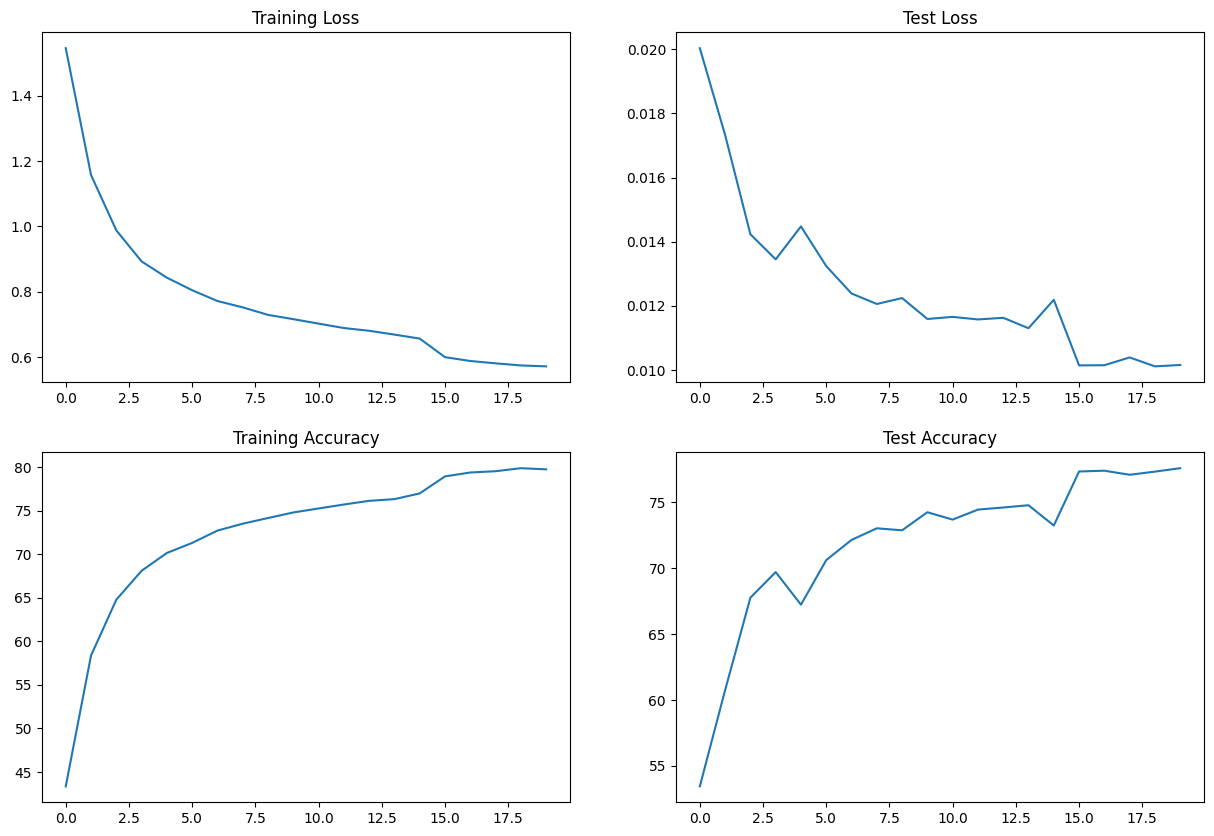

In [ ]:
plot_loss_accuracy(train_losses_bn, test_losses_bn, train_accuracy_bn, test_accuracy_bn)

Total Incorrect Predictions 2242


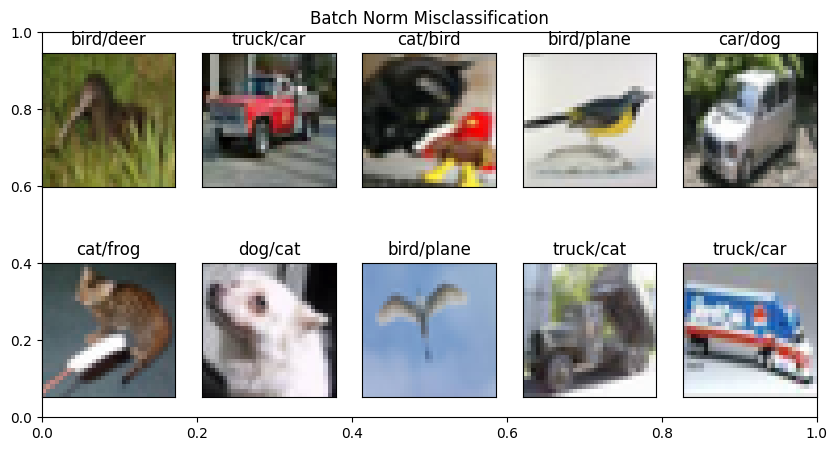

In [ ]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions
incorrect_prdeictions = get_incorrrect_predictions(model_bn, test_loader, device, criterion)
plot_incorrect_predictions(incorrect_prdeictions, class_map, 'Batch Norm Misclassification', 10)

In [ ]:
model_ln = Net(norm='ln').to(device)
optimizer = optim.SGD(model_ln.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc_ln, train_loss_ln = train_model(model_ln, device, train_loader, optimizer, criterion)
  train_accuracy_ln.append(train_acc_ln)
  train_losses_ln.append(train_loss_ln)
  test_acc_ln, test_loss_ln = test_model(model_ln, device, test_loader, criterion)
  test_accuracy_ln.append(test_acc_ln)
  test_losses_ln.append(test_loss_ln)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.4708 Batch_id=781 Accuracy=37.33: 100%|██████████| 782/782 [00:08<00:00, 90.88it/s]


Test set: Average loss: 0.0225, Accuracy: 4750/10000 (47.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.3472 Batch_id=781 Accuracy=49.84: 100%|██████████| 782/782 [00:08<00:00, 91.40it/s]


Test set: Average loss: 0.0202, Accuracy: 5373/10000 (53.73%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.3866 Batch_id=781 Accuracy=55.93: 100%|██████████| 782/782 [00:08<00:00, 91.00it/s]


Test set: Average loss: 0.0182, Accuracy: 5955/10000 (59.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.1730 Batch_id=781 Accuracy=59.59: 100%|██████████| 782/782 [00:08<00:00, 89.40it/s]


Test set: Average loss: 0.0170, Accuracy: 6170/10000 (61.70%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.7407 Batch_id=781 Accuracy=62.36: 100%|██████████| 782/782 [00:08<00:00, 89.49it/s]


Test set: Average loss: 0.0164, Accuracy: 6350/10000 (63.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.8553 Batch_id=781 Accuracy=63.99: 100%|██████████| 782/782 [00:08<00:00, 90.30it/s]


Test set: Average loss: 0.0155, Accuracy: 6476/10000 (64.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=1.5094 Batch_id=781 Accuracy=65.74: 100%|██████████| 782/782 [00:08<00:00, 91.44it/s]


Test set: Average loss: 0.0150, Accuracy: 6628/10000 (66.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.8726 Batch_id=781 Accuracy=67.02: 100%|██████████| 782/782 [00:08<00:00, 90.48it/s]


Test set: Average loss: 0.0147, Accuracy: 6674/10000 (66.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.9089 Batch_id=781 Accuracy=68.06: 100%|██████████| 782/782 [00:08<00:00, 89.82it/s]


Test set: Average loss: 0.0144, Accuracy: 6753/10000 (67.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.1725 Batch_id=781 Accuracy=68.84: 100%|██████████| 782/782 [00:08<00:00, 89.42it/s]


Test set: Average loss: 0.0140, Accuracy: 6891/10000 (68.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.8709 Batch_id=781 Accuracy=69.67: 100%|██████████| 782/782 [00:08<00:00, 91.37it/s]


Test set: Average loss: 0.0137, Accuracy: 6952/10000 (69.52%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.5253 Batch_id=781 Accuracy=70.57: 100%|██████████| 782/782 [00:08<00:00, 89.74it/s]


Test set: Average loss: 0.0136, Accuracy: 6953/10000 (69.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.4554 Batch_id=781 Accuracy=71.05: 100%|██████████| 782/782 [00:08<00:00, 92.14it/s]


Test set: Average loss: 0.0131, Accuracy: 7050/10000 (70.50%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.8691 Batch_id=781 Accuracy=71.58: 100%|██████████| 782/782 [00:08<00:00, 92.01it/s]


Test set: Average loss: 0.0131, Accuracy: 7069/10000 (70.69%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.6912 Batch_id=781 Accuracy=72.14: 100%|██████████| 782/782 [00:08<00:00, 93.04it/s]


Test set: Average loss: 0.0130, Accuracy: 7095/10000 (70.95%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.8139 Batch_id=781 Accuracy=75.80: 100%|██████████| 782/782 [00:08<00:00, 90.23it/s]


Test set: Average loss: 0.0121, Accuracy: 7311/10000 (73.11%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.3375 Batch_id=781 Accuracy=76.11: 100%|██████████| 782/782 [00:08<00:00, 91.46it/s]


Test set: Average loss: 0.0120, Accuracy: 7350/10000 (73.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.3288 Batch_id=781 Accuracy=76.31: 100%|██████████| 782/782 [00:08<00:00, 90.78it/s]


Test set: Average loss: 0.0120, Accuracy: 7355/10000 (73.55%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.6890 Batch_id=781 Accuracy=76.42: 100%|██████████| 782/782 [00:08<00:00, 92.60it/s]


Test set: Average loss: 0.0120, Accuracy: 7355/10000 (73.55%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.3416 Batch_id=781 Accuracy=76.45: 100%|██████████| 782/782 [00:08<00:00, 92.76it/s]


Test set: Average loss: 0.0119, Accuracy: 7358/10000 (73.58%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
!pip install torchsummary
from torchsummary import summary
summary(model_ln, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
         GroupNorm-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           1,168
         GroupNorm-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
           Dropout-7           [-1, 16, 32, 32]               0
            Conv2d-8            [-1, 8, 32, 32]             136
              ReLU-9            [-1, 8, 32, 32]               0
        MaxPool2d-10            [-1, 8, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,168
        GroupNorm-12           [-1, 16, 16, 16]              32
    

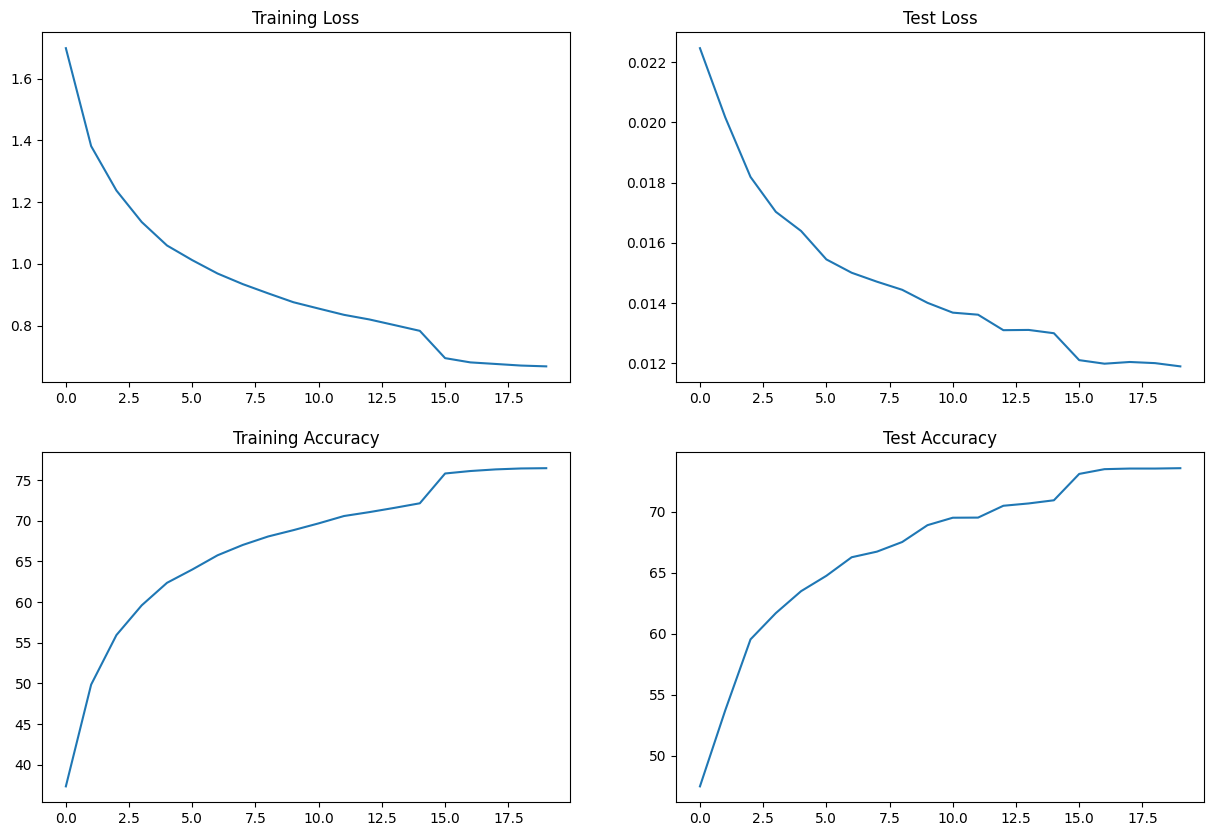

In [ ]:
plot_loss_accuracy(train_losses_ln, test_losses_ln, train_accuracy_ln, test_accuracy_ln)

Total Incorrect Predictions 2642


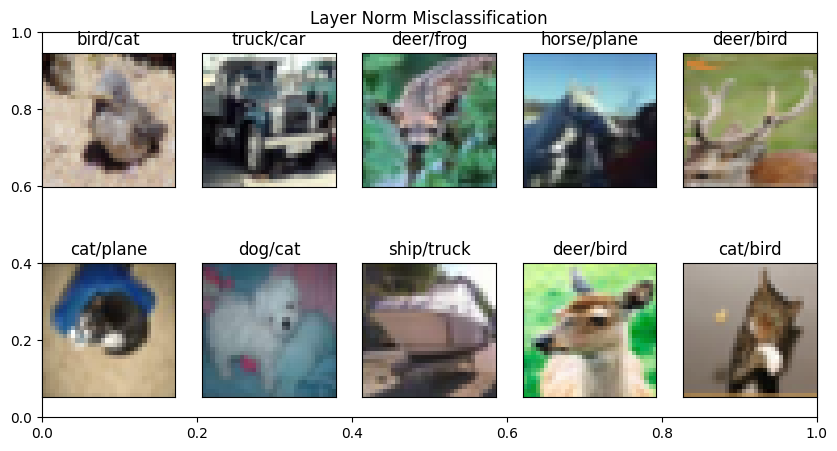

In [ ]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions
incorrect_prdeictions = get_incorrrect_predictions(model_ln, test_loader, device, criterion)
plot_incorrect_predictions(incorrect_prdeictions, class_map, 'Layer Norm Misclassification', 10)

In [ ]:

model_gn = Net(norm='gn').to(device)
optimizer = optim.SGD(model_gn.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 20
for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc_gn, train_loss_gn = train_model(model_gn, device, train_loader, optimizer, criterion)
  train_accuracy_gn.append(train_acc_gn)
  train_losses_gn.append(train_loss_gn)
  test_acc_gn, test_loss_gn = test_model(model_gn, device, test_loader, criterion)
  test_accuracy_gn.append(test_acc_gn)
  test_losses_gn.append(test_loss_gn)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.5433 Batch_id=781 Accuracy=35.46: 100%|██████████| 782/782 [00:09<00:00, 84.85it/s]


Test set: Average loss: 0.0226, Accuracy: 4829/10000 (48.29%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.5204 Batch_id=781 Accuracy=49.99: 100%|██████████| 782/782 [00:09<00:00, 86.46it/s]


Test set: Average loss: 0.0193, Accuracy: 5644/10000 (56.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.1116 Batch_id=781 Accuracy=56.12: 100%|██████████| 782/782 [00:09<00:00, 86.86it/s]


Test set: Average loss: 0.0183, Accuracy: 5840/10000 (58.40%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.2555 Batch_id=781 Accuracy=59.91: 100%|██████████| 782/782 [00:09<00:00, 86.12it/s]


Test set: Average loss: 0.0167, Accuracy: 6291/10000 (62.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=1.3300 Batch_id=781 Accuracy=63.01: 100%|██████████| 782/782 [00:08<00:00, 88.51it/s]


Test set: Average loss: 0.0160, Accuracy: 6436/10000 (64.36%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.8343 Batch_id=781 Accuracy=65.33: 100%|██████████| 782/782 [00:09<00:00, 85.81it/s]


Test set: Average loss: 0.0156, Accuracy: 6476/10000 (64.76%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.7450 Batch_id=781 Accuracy=66.81: 100%|██████████| 782/782 [00:08<00:00, 88.20it/s]


Test set: Average loss: 0.0148, Accuracy: 6688/10000 (66.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=1.3604 Batch_id=781 Accuracy=67.96: 100%|██████████| 782/782 [00:08<00:00, 87.33it/s]


Test set: Average loss: 0.0144, Accuracy: 6838/10000 (68.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.5699 Batch_id=781 Accuracy=69.03: 100%|██████████| 782/782 [00:08<00:00, 87.28it/s]


Test set: Average loss: 0.0146, Accuracy: 6787/10000 (67.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=1.2947 Batch_id=781 Accuracy=69.61: 100%|██████████| 782/782 [00:09<00:00, 85.33it/s]


Test set: Average loss: 0.0144, Accuracy: 6842/10000 (68.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.9695 Batch_id=781 Accuracy=70.59: 100%|██████████| 782/782 [00:09<00:00, 86.12it/s]


Test set: Average loss: 0.0137, Accuracy: 6997/10000 (69.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=1.4015 Batch_id=781 Accuracy=71.17: 100%|██████████| 782/782 [00:08<00:00, 87.92it/s]


Test set: Average loss: 0.0139, Accuracy: 6927/10000 (69.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=1.1912 Batch_id=781 Accuracy=71.73: 100%|██████████| 782/782 [00:08<00:00, 87.53it/s]


Test set: Average loss: 0.0134, Accuracy: 7026/10000 (70.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.7295 Batch_id=781 Accuracy=72.10: 100%|██████████| 782/782 [00:08<00:00, 87.52it/s]


Test set: Average loss: 0.0130, Accuracy: 7131/10000 (71.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=1.0345 Batch_id=781 Accuracy=72.62: 100%|██████████| 782/782 [00:09<00:00, 86.29it/s]


Test set: Average loss: 0.0125, Accuracy: 7236/10000 (72.36%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.9594 Batch_id=781 Accuracy=75.44: 100%|██████████| 782/782 [00:08<00:00, 88.39it/s]


Test set: Average loss: 0.0120, Accuracy: 7354/10000 (73.54%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.9031 Batch_id=781 Accuracy=75.90: 100%|██████████| 782/782 [00:09<00:00, 86.82it/s]


Test set: Average loss: 0.0119, Accuracy: 7377/10000 (73.77%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1730 Batch_id=781 Accuracy=76.13: 100%|██████████| 782/782 [00:09<00:00, 85.81it/s]


Test set: Average loss: 0.0119, Accuracy: 7397/10000 (73.97%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.7796 Batch_id=781 Accuracy=76.05: 100%|██████████| 782/782 [00:09<00:00, 86.87it/s]


Test set: Average loss: 0.0119, Accuracy: 7404/10000 (74.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.4314 Batch_id=781 Accuracy=76.29: 100%|██████████| 782/782 [00:09<00:00, 86.41it/s]


Test set: Average loss: 0.0119, Accuracy: 7396/10000 (73.96%)

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
!pip install torchsummary
from torchsummary import summary
summary(model_gn, input_size=(3, 32, 32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
         GroupNorm-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           1,168
         GroupNorm-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
           Dropout-7           [-1, 16, 32, 32]               0
            Conv2d-8            [-1, 8, 32, 32]             136
              ReLU-9            [-1, 8, 32, 32]               0
        MaxPool2d-10            [-1, 8, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,168
        GroupNorm-12           [-1, 16, 16, 16]              32
    

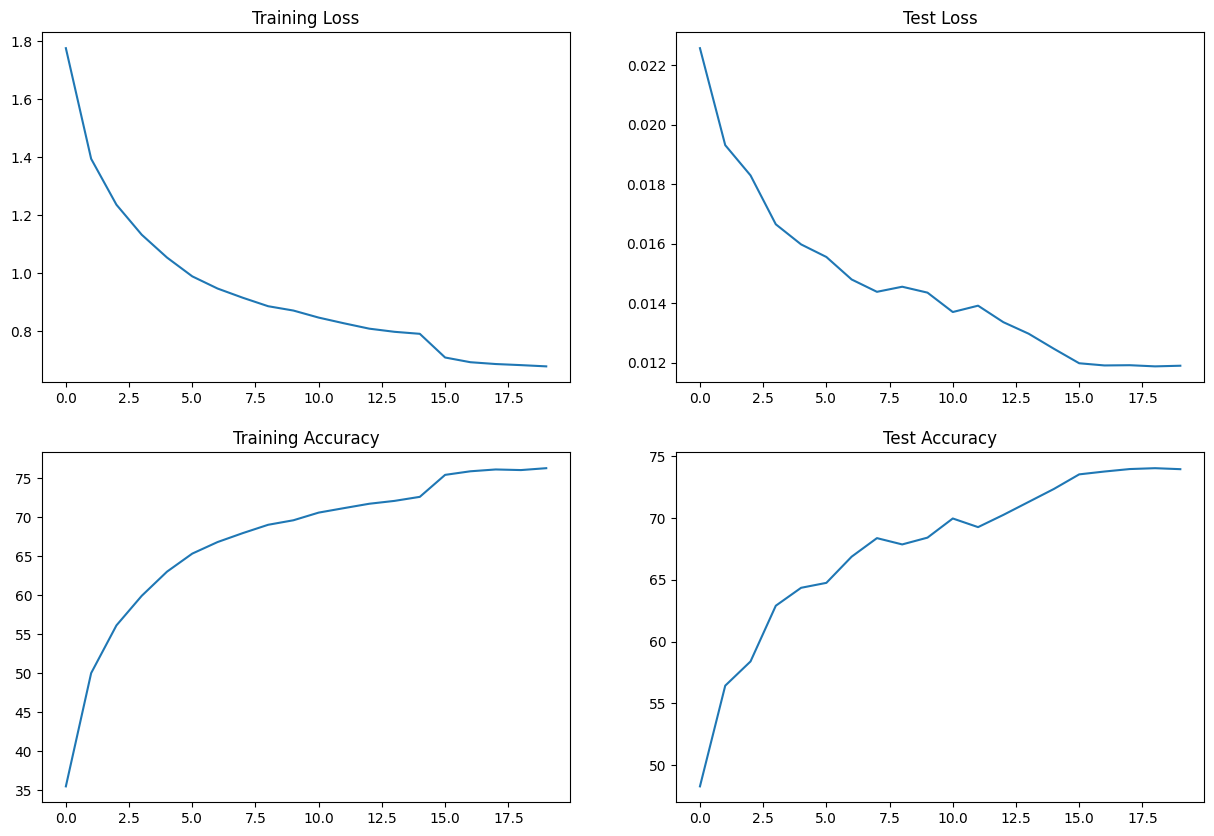

In [ ]:
plot_loss_accuracy(train_losses_gn, test_losses_gn, train_accuracy_gn, test_accuracy_gn)

Total Incorrect Predictions 2604


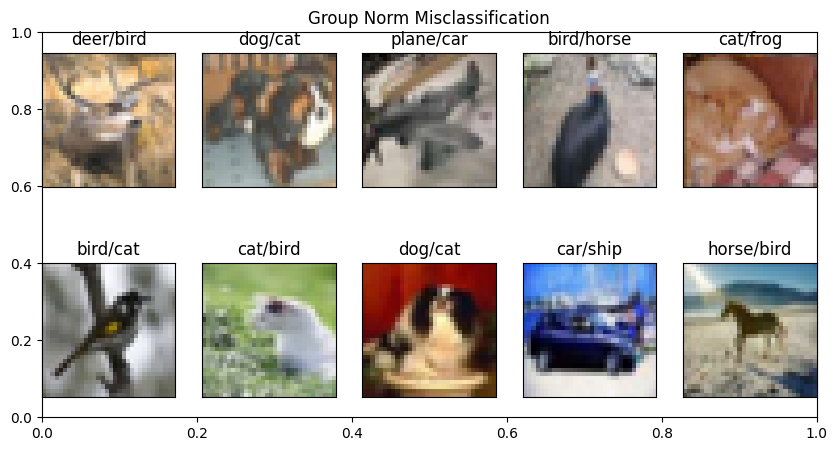

In [ ]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions
incorrect_prdeictions = get_incorrrect_predictions(model_gn, test_loader, device, criterion)
plot_incorrect_predictions(incorrect_prdeictions, class_map, 'Group Norm Misclassification', 10)

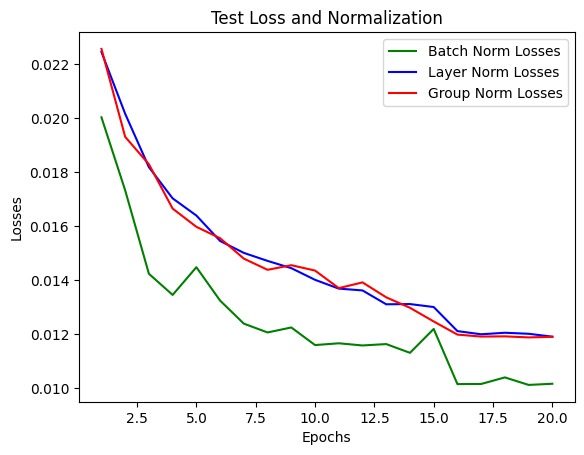

In [ ]:
epochs = range(1,21)
plt.plot(epochs, test_losses_bn, 'g', label='Batch Norm Losses')
plt.plot(epochs, test_losses_ln, 'b', label='Layer Norm Losses')
plt.plot(epochs, test_losses_gn, 'r', label='Group Norm Losses')
plt.title('Test Loss and Normalization')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()